In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
uber_df = pd.read_csv(r"C:\Users\Rahul\Desktop\Data Science\Data Analyst\Python/UberDataset.csv")

In [4]:
# Show all last 10 records of dataset
uber_df.tail(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Kar?chi,Kar?chi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [6]:
# Show all first 10 records of dataset
uber_df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [76]:
print(uber_df.shape)
uber_df.dtypes

(1156, 7)


START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [77]:
# Checking null values
uber_df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [78]:
uber_df[uber_df['END_DATE'].isna()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [80]:
uber_df.drop(uber_df[uber_df["END_DATE"].isna()].index,axis=0, inplace=True)
uber_df.isna().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [115]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 1154
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  733 non-null    datetime64[ns]
 1   END_DATE    734 non-null    datetime64[ns]
 2   CATEGORY    1154 non-null   object        
 3   START       1154 non-null   object        
 4   STOP        1154 non-null   object        
 5   MILES       1154 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 63.1+ KB


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES
0,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.1
1,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.0
2,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.8
3,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.7
4,NaT,NaT,Business,Fort Pierce,West Palm Beach,63.7


In [82]:
# Dropping PURPOSE
uber_df.drop(['PURPOSE'],axis=1, inplace=True)
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7


In [83]:
uber_df[uber_df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9


In [114]:
uber_df.drop(uber_df[uber_df.duplicated()].index, axis=0, inplace=True)
uber_df[uber_df.duplicated()]


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES
0,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.1
1,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.0
2,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.8
3,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.7
4,NaT,NaT,Business,Fort Pierce,West Palm Beach,63.7


In [100]:
# Converting start_date and end_date columns into datetime
uber_df['START_DATE'] = pd.to_datetime(uber_df['START_DATE'], format= '%m/%d/%Y %H:%M', errors='coerce')
uber_df['END_DATE'] = pd.to_datetime(uber_df['END_DATE'], format= '%m/%d/%Y %H:%M', errors='coerce')
uber_df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
dtype: object

In [101]:
uber_df['CATEGORY'].unique()

array(['Business', 'Personal'], dtype=object)

In [103]:
uber_df[['CATEGORY', 'MILES']].groupby(['CATEGORY']).agg(top_miles=('MILES','sum'))

,top_miles
CATEGORY,
Business,11477.1
Personal,717.7


Text(0.5, 1.0, 'Total miles per Category')

<Figure size 640x480 with 0 Axes>

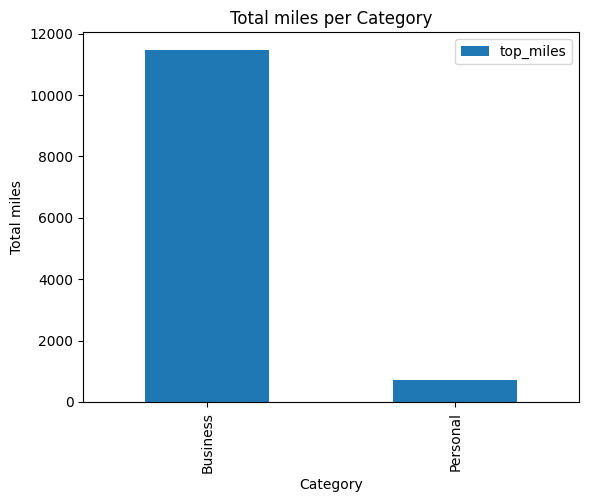

In [104]:
plt.figure()
uber_df[['CATEGORY', 'MILES']].groupby(['CATEGORY']).agg(top_miles=('MILES','sum')).plot(kind='bar')
plt.xlabel("Category")
plt.ylabel('Total miles')
plt.title('Total miles per Category')

In [105]:
len(uber_df['START'].unique())

177

In [106]:
uber_df['START'].value_counts(ascending=False)[:10]

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Pickup Places'}, xlabel='Pickup Counts', ylabel='Places'>

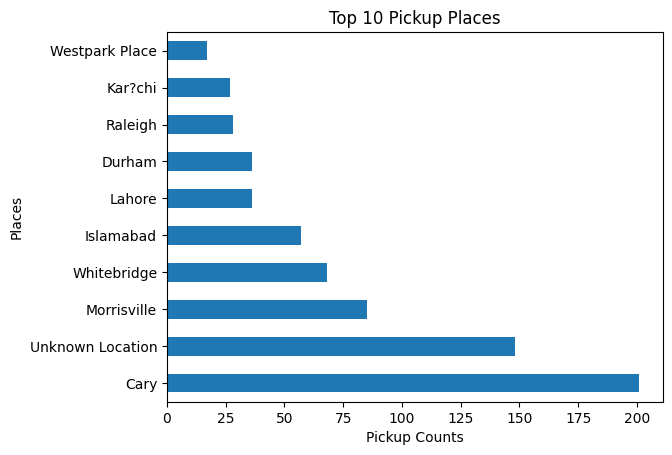

In [107]:
uber_df['START'].value_counts(ascending=False)[:10].plot(kind='barh', ylabel='Places', xlabel='Pickup Counts'
                                                        , title='Top 10 Pickup Places')

In [108]:
len(uber_df['STOP'].unique())

188

<Axes: title={'center': 'Top 10 Drop Places'}, xlabel='Drop Counts', ylabel='Places'>

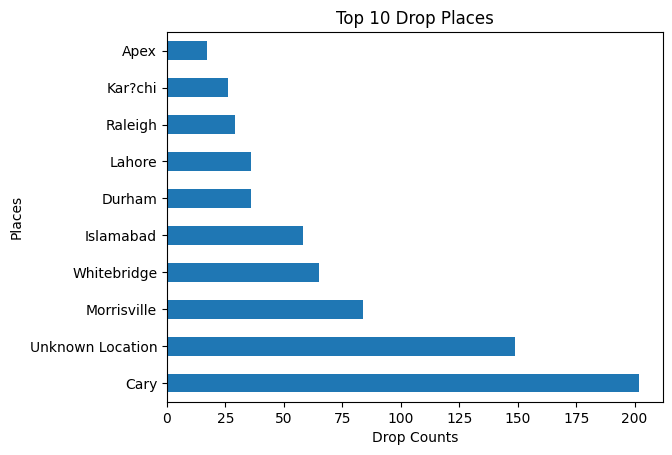

In [109]:
uber_df['STOP'].value_counts(ascending=False)[:10].plot(kind='barh', ylabel='Places', xlabel='Drop Counts'
                                                        , title='Top 10 Drop Places')

In [110]:
uber_df[uber_df['START']=='Unknown location']['START'].value_counts()

Series([], Name: count, dtype: int64)

<Axes: xlabel='MILES', ylabel='Count'>

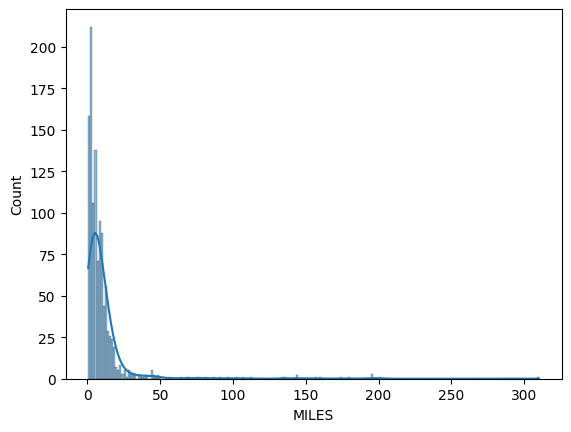

In [111]:
sns.histplot(uber_df['MILES'],kde=True)

In [112]:
uber_df.describe().T

,count,mean,min,25%,50%,75%,max,std
START_DATE,733,2016-07-25 21:32:41.909958912,2016-01-13 13:54:00,2016-03-31 14:37:00,2016-07-28 00:04:00,2016-10-28 15:53:00,2016-12-31 22:08:00,NaN
END_DATE,734,2016-07-25 21:32:51.580381440,2016-01-13 14:07:00,2016-04-04 01:24:00,2016-07-27 23:17:30,2016-10-28 16:53:15,2016-12-31 23:51:00,NaN
MILES,1154.0,10.567418,0.5,2.9,6.0,10.4,310.3,21.588452
